
# 项目：调查“未前往就诊的挂号预约”的数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 本次报告我选择的是“未前往就诊的挂号预约”数据集，数据中含有患者编号、预约编号、患者性别、年龄、医院地址、患者病史（是否患有高血压、糖尿病、残疾等）、就诊前是否收到短信提醒等信息。我选取了性别（gender）、年龄（age）及就诊前是否收到短信提醒（SMS_received）这三个变量，探究不同年龄、性别及是否收到提醒对就诊率是否有影响。

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns    
sns.set_style('darkgrid')

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#查看数据是否有缺失数据或错误数据的情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


可以看出，该文件共有110527行数据，没有缺失值。

In [4]:
#查看数据各列类型
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#查看数据行列数
df.shape

(110527, 14)

In [6]:
#查看性别列签的值分布情况
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [7]:
#查看年龄的值分布情况
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

可以看到年龄最小值为-1，为异常值，应清除。

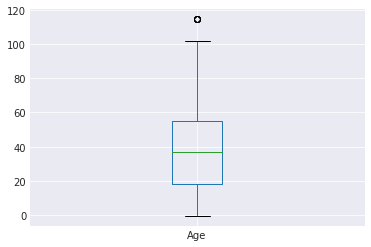

In [8]:
#对Age做箱形图，看该列数据分布
df['Age'].plot(kind='box')

In [9]:
#查看是否收到短信列的情况
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理（请用更具体的标题来代替该标题。）

In [10]:
# 在讨论数据结构和需要解决的任何问题之后，在本部分的第二小部分进行这些清理步骤。
#删除年龄为-1的异常值
df=df[df['Age']!=-1]

In [11]:
#验证是否清除异常值
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [12]:
#查看数据集中是否有重复值
sum(df.duplicated())  

0

In [13]:
#更改列标签中的'-'为下划线'_'
df.rename(index=str,columns={"No-show":"No_show"}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#查看就诊情况，No代表就诊，Yes代表未就诊
df['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

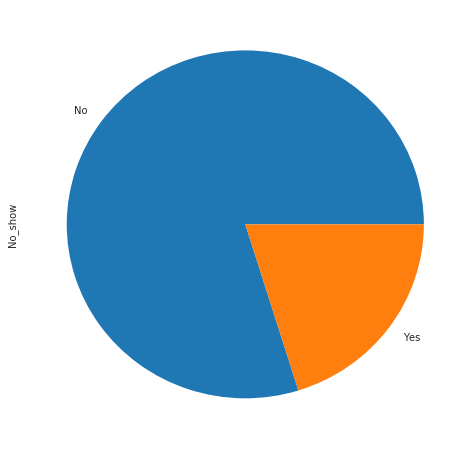

In [15]:
#对No_show做饼图，看该列数据分布
df['No_show'].value_counts().plot(kind='pie',figsize=(8,8))

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（不同性别患者的就诊率是否有差别 ）

In [16]:
# 用这个代码框和其它代码框探索数据。请务必记得添加Markdown 框，以便记录你的观察和调查结果。
#不同性别情况
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [17]:
#求女性患者人数
df_f=df.query('Gender=="F"')
total_f=df_f['No_show'].count()
total_f

71839

In [18]:
#求女性患者如约就诊人数
total_f_show=df_f.query('No_show=="No"')['No_show'].count()
total_f_show

57245

In [19]:
#求女性就诊比例
prop_f=total_f_show/total_f
prop_f

0.79685129247344755

In [20]:
#同上，求男性患者如约就诊比例
df_m=df.query('Gender=="M"')
total_m=df_m['No_show'].count()
total_m_show=df_m.query('No_show=="No"')['No_show'].count()
prop_m=total_m_show/total_m
prop_m

0.80032052110528085

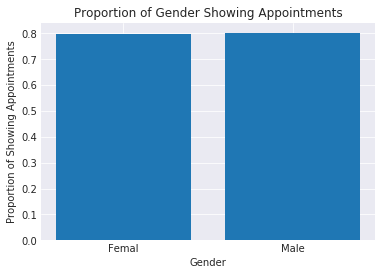

In [21]:
#性别和就诊率关系可视化
plt.bar(["Femal", "Male"], [prop_f, prop_m])
plt.title("Proportion of Gender Showing Appointments")
plt.xlabel("Gender")
plt.ylabel("Proportion of Showing Appointments");

### 研究问题 2（不同年龄患者的就诊率是否有差异）

In [22]:
# 请继续探索数据，解决你额外的研究问题。
##查看年龄分布
df['Age'].describe()  

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [23]:
#使用cut分组，分成少年组、青年组、中年组和老年组
bin_edges=[0,18,37,55,115]
bin_names = ['younger' ,'youth' , 'middle_ager', 'older'] 

In [24]:
#创建 age_levels 列
df['age_levels'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [25]:
#检查age_levels 列是否成功创建
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,age_levels
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,older
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,older
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,older
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,younger
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,older


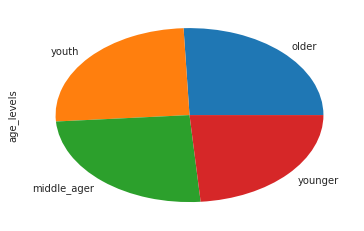

In [29]:
df['age_levels'].value_counts().plot(kind='pie')

In [30]:
#根据年龄分组生成新列'age_levels',接下来看不同年龄阶段的就诊率是否有差异
#获取每个年龄段和就诊情况的总数
age_counts = df.groupby(['age_levels', 'No_show']).count()['SMS_received']
age_counts

age_levels   No_show
younger      No         19619
             Yes         5708
youth        No         20836
             Yes         6414
middle_ager  No         21651
             Yes         5255
older        No         23201
             Yes         4303
Name: SMS_received, dtype: int64

In [31]:
#获取每个年龄段的总数
age_totals = df.groupby('age_levels').count()['SMS_received']
age_totals

age_levels
younger        25327
youth          27250
middle_ager    26906
older          27504
Name: SMS_received, dtype: int64

In [32]:
# 将younger就诊情况除以younger总数，获取比例
younger_proportions = age_counts['younger'] / age_totals['younger']
younger_proportions

No_show
No     0.774628
Yes    0.225372
Name: SMS_received, dtype: float64

In [33]:
# 将youth就诊情况除以youth 总数，获取比例
youth_proportions = age_counts['youth'] / age_totals['youth']
youth_proportions

No_show
No     0.764624
Yes    0.235376
Name: SMS_received, dtype: float64

In [34]:
# 将middle_ager就诊情况除以middle_ager总数，获取比例
middle_ager_proportions = age_counts['middle_ager'] / age_totals['middle_ager']
middle_ager_proportions

No_show
No     0.80469
Yes    0.19531
Name: SMS_received, dtype: float64

In [35]:
# 将older 就诊情况除以older 总数，获取比例
older_proportions = age_counts['older'] / age_totals['older']
older_proportions

No_show
No     0.84355
Yes    0.15645
Name: SMS_received, dtype: float64

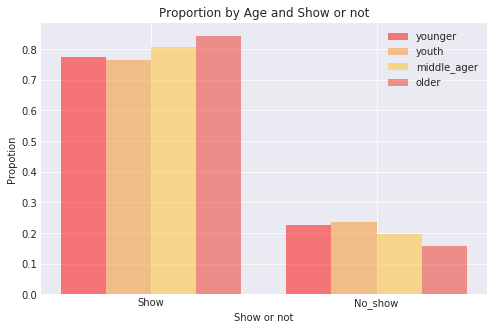

In [36]:
#柱状图上绘制比例：设置每个等级组的 x 坐标位置和每个条柱的宽度。
ind = np.arange(len(younger_proportions)) 
width = 0.2
fig,ax=plt.subplots(figsize=(8,5))
younger_bars = plt.bar(ind, younger_proportions, width, color='r', alpha=.5, label='younger')
youth_bars = plt.bar(ind + width, youth_proportions, width, color='#F78F1E', alpha=.5, label='youth')
middle_ager_bars = plt.bar(ind + 2*width, middle_ager_proportions, width, color='#FFC222', alpha=.5, label='middle_ager')
older_bars = plt.bar(ind + 3*width, older_proportions, width, color='#EE3224', alpha=.5, label='older')
plt.ylabel('Propotion')
plt.xlabel('Show or not')
plt.title('Proportion by Age and Show or not')
locations = ind +1.5*width  
labels = ['Show', 'No_show']  
plt.xticks(locations, labels)   
plt.legend()

由上图发现，不同年龄段的患者就诊率不同。各年龄段中就诊率最高的是老年组（0.84355），其次为中年组（0.80469）、少年组（0.774628）、青年组（ 0.764624）。未如约就诊率最高的是青年组（0.235376），其次为少年组（0.225372）、中年组（0.19531），老年组（0.15645）未如约就诊率最低。

### 研究问题 3（收到短信与否对就诊率是否有影响）

In [37]:
#获取是否收到短信和就诊情况的总数
No_show_counts = df.groupby(['No_show','SMS_received']).count()['Age']
No_show_counts

No_show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: Age, dtype: int64

In [38]:
#收到短信的患者总数
df_SMS_received=df.query('SMS_received==1')
df_SMS_received_total=df_SMS_received.count()['Age']
df_SMS_received_total

35482

In [39]:
#收到短信的患者来就诊的人数
df_SMS_show=df_SMS_received.query('No_show=="No"').count()['Age']
df_SMS_show

25698

In [40]:
#收到短信的患者来就诊的比例
SMS_Show_prop=df_SMS_show/df_SMS_received_total
SMS_Show_prop

0.72425455160363006

In [41]:
#同上，未收到短信的患者来就诊的比例
df_No_SMS_received=df.query('SMS_received==0')
df_No_SMS_received_total=df_No_SMS_received.count()['Age']
df_No_SMS_show=df_No_SMS_received.query('No_show=="No"').count()['Age']
No_SMS_Show_prop=df_No_SMS_show/df_No_SMS_received_total
No_SMS_Show_prop

0.8329646607323703

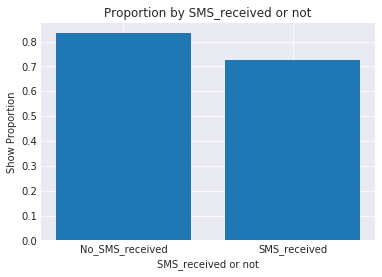

In [42]:
#可视化，是否收到短信的患者就诊率是否有差别
locations = [1, 2]                                                   
heights = [No_SMS_Show_prop, SMS_Show_prop]    
labels = ['No_SMS_received', 'SMS_received']                                         
plt.bar(locations, heights, tick_label=labels)             
plt.title('Proportion by SMS_received or not') 
plt.xlabel('SMS_received or not')                                      
plt.ylabel('Show Proportion');     

由上图可见，收到短信患者的就诊率为0.7243，未收到短信患者的就诊率为0.8330，似乎未收到短信患者的就诊率还更高。如之前提到的，由于该数据集都是进行过预约的患者，因此可以推测他们都具有较强的就诊意愿。

<a id='conclusions'></a>
## 结论

>   经过分析发现：（1）不同性别的患者（男、女）在就诊率上差别不大（0.7968,0.8003）；（2）不同年龄段在就诊率上有差别，老年组的就诊率高于其他三组，但是否达到显著性差异，仍需进行更严谨的分析；（3）收到短信患者的就诊率为0.7243，未收到短信患者的就诊率为0.8330，似乎未收到短信患者的就诊率还更高，这或许是因为患者均进行过预约有较强的就诊意愿，但差异是否达到显著性，仍需进行更严谨的分析。
    该结论的局限性：（1）由于该数据集采用的数据是预约就诊的患者样本，该样本群体普遍具有较强的就诊意愿，虽然样本量较大，110527名，但不能够代表总体；（2）以上结论的得出依据的是描述性统计数据，如需进一步验证因果关系，需要进行更加严谨的测试，比如“双盲试验”。

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255